In [28]:
lines = []
with open('data_raw/kinase_domains.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line:
            lines.append(line)

fam_to_seqs = {}
seqs = []
fams = []

isKinase = False
kinase = False
for line in lines:
    
    if line[0]=='>':
        if kinase:
            seqs.append(seq)
            fams.append(kinase)
            if kinase in fam_to_seqs.keys():
                fam_to_seqs[kinase].append(seq)
            else:
                fam_to_seqs[kinase] = [seq]
        isKinase = True
        kinase = line[line.find(':')+1:]
        kinase = kinase[:kinase.find(':')]
        seq = ''
    else:
        isKinase = False
        seq = seq + line.upper()

In [57]:
seqs = numpy.array((list(set((seqs)))))
fams = numpy.array((list(set(fams))))

print(len(seqs))

530


In [63]:
print( max([len(seq) for seq in seqs]) )
print( min([len(seq) for seq in seqs if '/' not in seq]) )

606
64


In [64]:
for seq in seqs:
    if len(seq)==64:
        print(seq)

QTFQHWLYQWTNGSFLVTDLAGVDWKMTDVQIATKLRGYQGLKESCFPALLDRFASSHQCNAYC


In [31]:
import numpy
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import Levenshtein
from Levenshtein import hamming
from itertools import combinations
import matplotlib.pyplot as plt
import math
import random
# from Bio import pairwise2
from Bio import Align
from Bio.SubsMat import MatrixInfo
import sklearn.cluster
import itertools
import time

In [34]:
alignments2 = numpy.full((len(seqs),len(seqs)),-1.0)

aligner = Align.PairwiseAligner()
aligner.substitution_matrix = substitution_matrices.load('BLOSUM62') # PAM30
aligner.mode = 'local'

start = time.time()

for i,seq1 in enumerate(seqs):  
    if i%2==0:
        print ('iter %d | %5.3f secs' % (i, time.time()-start) )
        start = time.time()
    for j,seq2 in enumerate(seqs):
        if alignments2[j][i] != -1: # or i==j:
            continue
        if len(seq1)==3 or len(seq2)==3:
            continue
        score = aligner.align(seq1,seq2).score
        alignments2[i][j] = score
        alignments2[j][i] = score

iter 0 | 0.000 secs
iter 2 | 1.172 secs
iter 4 | 1.282 secs
iter 6 | 1.118 secs
iter 8 | 1.146 secs
iter 10 | 1.283 secs
iter 12 | 1.251 secs
iter 14 | 1.056 secs
iter 16 | 0.801 secs
iter 18 | 1.165 secs
iter 20 | 1.398 secs
iter 22 | 1.060 secs
iter 24 | 0.547 secs
iter 26 | 1.053 secs
iter 28 | 1.213 secs
iter 30 | 1.134 secs
iter 32 | 1.214 secs
iter 34 | 1.151 secs
iter 36 | 0.817 secs
iter 38 | 1.119 secs
iter 40 | 1.838 secs
iter 42 | 0.950 secs
iter 44 | 1.074 secs
iter 46 | 1.113 secs
iter 48 | 1.568 secs
iter 50 | 1.069 secs
iter 52 | 1.217 secs
iter 54 | 0.736 secs
iter 56 | 1.050 secs
iter 58 | 1.006 secs
iter 60 | 0.817 secs
iter 62 | 1.352 secs
iter 64 | 1.024 secs
iter 66 | 1.283 secs
iter 68 | 1.054 secs
iter 70 | 1.184 secs
iter 72 | 0.991 secs
iter 74 | 0.993 secs
iter 76 | 0.961 secs
iter 78 | 0.964 secs
iter 80 | 0.985 secs
iter 82 | 1.036 secs
iter 84 | 1.083 secs
iter 86 | 1.024 secs
iter 88 | 0.929 secs
iter 90 | 1.034 secs
iter 92 | 1.286 secs
iter 94 | 0.923 se

[1363.  646.  593. ...  600.  736. 1329.]


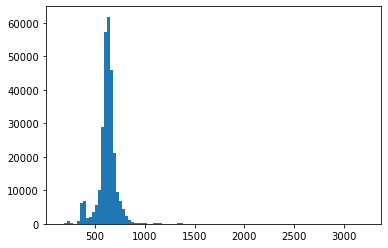

In [35]:
import numpy as np
import matplotlib.pyplot as plt

toPlot = alignments2.flatten()
toPlot = toPlot[toPlot != -1]

print(toPlot)

plt.hist(toPlot,bins=100)
plt.show()

In [37]:
from itertools import combinations 
from itertools import product 

famPair_to_kinaseDistances2 = {tuple((pair[0],pair[1])):[] for pair in combinations(fams,2)}

for pair in combinations(fams,2):
    fam1 = pair[0]
    fam2 = pair[1]
    seqList1 = fam_to_seqs[fam1]
    seqList2 = fam_to_seqs[fam2]
        
    for pair2 in product(seqList1,seqList2): 
        seq1 = pair2[0]
        seq2 = pair2[1]
        seqIdx1 = numpy.where(seqs==seq1)[0][0]
        seqIdx2 = numpy.where(seqs==seq2)[0][0]
        
        distance = alignments2[seqIdx1][seqIdx2]
        if distance < 0 and distance > -1:
            print(distance)
        if distance == -1.0:
            continue

        famPair_to_kinaseDistances2[tuple((fam1,fam2))].append(distance)
        

dupFamTups = [tuple((f,f)) for f in fams]
for ff in dupFamTups:
    famPair_to_kinaseDistances2[ff] = []

for pair in dupFamTups:
    fam1 = pair[0]
    fam2 = pair[1]
    seqList1 = fam_to_seqs[fam1]
    seqList2 = fam_to_seqs[fam2]
        
    for pair2 in product(seqList1,seqList2):
        seq1 = pair2[0]
        seq2 = pair2[1]
        seqIdx1 = numpy.where(seqs==seq1)[0][0]
        seqIdx2 = numpy.where(seqs==seq2)[0][0]
        
        distance = alignments2[seqIdx1][seqIdx2]
        if distance < 0 and distance > -1:
            print(distance)
        if distance == -1.0:
            continue

        famPair_to_kinaseDistances2[tuple((fam1,fam2))].append(distance)      
        
        
        
        
        
        

famDistanceMatrix2 = numpy.full((len(fams),len(fams)),-1.0)

for k,v in famPair_to_kinaseDistances2.items():
    toAvg = list(set(v))
#     if 'PKA' in k and 'CK2' in k:
#         print(k,toAvg,fam_to_seqs[k[0]],fam_to_seqs[k[1]])
    toAvg = numpy.array((v))
    avgDistance = numpy.mean(toAvg)
    fIdx1 = numpy.where(fams==k[0])[0][0]
    fIdx2 = numpy.where(fams==k[1])[0][0]
    famDistanceMatrix2[fIdx1][fIdx2] = avgDistance
    
for i,row in enumerate(famDistanceMatrix2):
    for j,val in enumerate(row):
        famDistanceMatrix2[j][i] = famDistanceMatrix2[i][j]
        
for i,row in enumerate(famDistanceMatrix2):
    for j,val in enumerate(row):
#         if i==j:
#             famDistanceMatrix2[i][j] = 1
        if val == -1:
            famDistanceMatrix2[i][j] = 0

In [51]:
import pandas
df = pandas.DataFrame(famDistanceMatrix2,dtype=float)
df.to_csv('data_dev/fam_alignments.csv',header=fams,index_label=fams)

In [49]:
someKs = ['MAPK', 'Src','PKC','PKA','CDK','CK2','Akt','PIKK']
dups = [[f,f] for f in someKs]

for pair in combinations(someKs,2):
    i = numpy.where(fams==pair[0])[0][0]
    j = numpy.where(fams==pair[1])[0][0]
    p = famDistanceMatrix2[i][j]
    print(pair[0],pair[1],p)
for pair in dups:
    i = numpy.where(fams==pair[0])[0][0]
    j = numpy.where(fams==pair[1])[0][0]
    p = famDistanceMatrix2[i][j]
    print(pair[0],pair[1],p)

MAPK Src 642.1298701298701
MAPK PKC 646.2698412698413
MAPK PKA 632.4428571428572
MAPK CDK 779.5034013605442
MAPK CK2 736.8571428571429
MAPK Akt 645.1428571428571
MAPK PIKK 643.7380952380952
Src PKC 593.8585858585859
Src PKA 559.7636363636364
Src CDK 642.6277056277056
Src CK2 592.5454545454545
Src Akt 589.3636363636364
Src PIKK 595.3181818181819
PKC PKA 743.8666666666667
PKC CDK 655.8994708994709
PKC CK2 643.5555555555555
PKC Akt 870.0370370370371
PKC PIKK 617.9444444444445
PKA CDK 635.1238095238095
PKA CK2 607.9
PKA Akt 789.2666666666667
PKA PIKK 588.8666666666667
CDK CK2 726.6190476190476
CDK Akt 654.1904761904761
CDK PIKK 645.563492063492
CK2 Akt 650.1666666666666
CK2 PIKK 636.0
Akt PIKK 614.6111111111111
MAPK MAPK 961.015306122449
Src Src 986.1900826446281
PKC PKC 1036.320987654321
PKA PKA 1055.2
CDK CDK 923.8208616780046
CK2 CK2 1456.5
Akt Akt 1291.888888888889
PIKK PIKK 935.1944444444445


In [47]:
maximum = numpy.max(famDistanceMatrix2)
minimum = numpy.min(famDistanceMatrix2)

print(maximum,minimum)

famDistanceMatrix2_scaled = numpy.array((famDistanceMatrix2))
for i in range(len(fams)):
    for j in range(len(fams)):
        famDistanceMatrix2_scaled[i][j] = 1 - float(famDistanceMatrix2[i][j]-minimum)/(maximum-minimum) 

2649.0 261.6666666666667


In [46]:
someKs = ['MAPK', 'Src','PKC','PKA','CDK','CK2','Akt']

famDistanceMatrix_pam = numpy.array((famDistanceMatrix2_scaled))

for pair in combinations(someKs,2):
    i = numpy.where(fams==pair[0])[0][0]
    j = numpy.where(fams==pair[1])[0][0]
    p = famDistanceMatrix_pam[i][j]
    print(pair[0],pair[1],p)

MAPK Src 0.8406325592865665
MAPK PKC 0.838898418904004
MAPK PKA 0.8446902301831093
MAPK CDK 0.7830898905219725
MAPK CK2 0.8009534447680218
MAPK Akt 0.8393704870945865
Src PKC 0.860852309749266
Src PKA 0.8751339138381864
Src CDK 0.8404240272433514
Src CK2 0.8614023507907898
Src Akt 0.8627351425452514
PKC PKA 0.7980173135995532
PKC CDK 0.8348647845994956
PKC CK2 0.840035371870055
PKC Akt 0.7451673958236371
PKA CDK 0.8435672397973432
PKA CK2 0.8549706785814019
PKA Akt 0.7790002792516058
CDK CK2 0.805241951569793
CDK Akt 0.8355806438744167
CK2 Akt 0.837266126780229


In [56]:
df = pandas.DataFrame(famDistanceMatrix2,dtype=float)
df.to_csv('data_dev/fam_distances_blos62/dist_matrix.csv',header=None,index=None)

fams = [x.upper() for x in fams]
df = pandas.DataFrame(fams,dtype='U')
df.to_csv('data_dev/fam_distances_blos62/fams.csv',header=None,index=None)